In [1]:
import torch
import numpy as np

import torchvision 
import matplotlib.pyplot as plt

# 保存图片
if not os.path.exists('./visualization_figures_save'):
    os.makedirs('./visualization_figures_save')

Sum of train_data(Official):  60000
Sum of test_data(Official):  10000
Image shape:  torch.Size([28, 28])


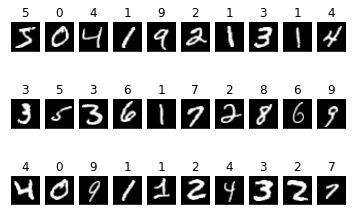

train_X_y_shape
 torch.Size([60000, 1, 28, 28]) torch.Size([60000])
test_X_y_shape
 torch.Size([10000, 1, 28, 28]) torch.Size([10000])


In [2]:
########## 数据下载与展示 ##########
# 下载官方MNIST数据集并读取数据集
data_train = torchvision.datasets.MNIST(root='./data', train=True,
                                       transform=torchvision.transforms.ToTensor(), download=True)
data_test = torchvision.datasets.MNIST(root='./data', train=False,
                                      transform=torchvision.transforms.ToTensor(),download=True)

print('Sum of train_data(Official): ', len(data_train))
print('Sum of test_data(Official): ', len(data_test))
print('Image shape: ', data_train.data.shape[1:])

# 抽取部分图片展示
fig = plt.figure()
for i in range(30):
    plt.subplot(3,10,i+1),plt.imshow(data_train.data[i].numpy(), cmap='gray')
    plt.title('%i' % data_train.targets[i])
    plt.xticks([]),plt.yticks([])
    plt.savefig('./visualization_figures_save/digital_show.png')
plt.show()

X_train = torch.unsqueeze(data_train.data, 1)
y_train = data_train.targets
print('train_X_y_shape\n', X_train.shape, y_train.shape)

X_test = torch.unsqueeze(data_test.data, 1)
y_test = data_test.targets
print('test_X_y_shape\n', X_test.shape, y_test.shape)


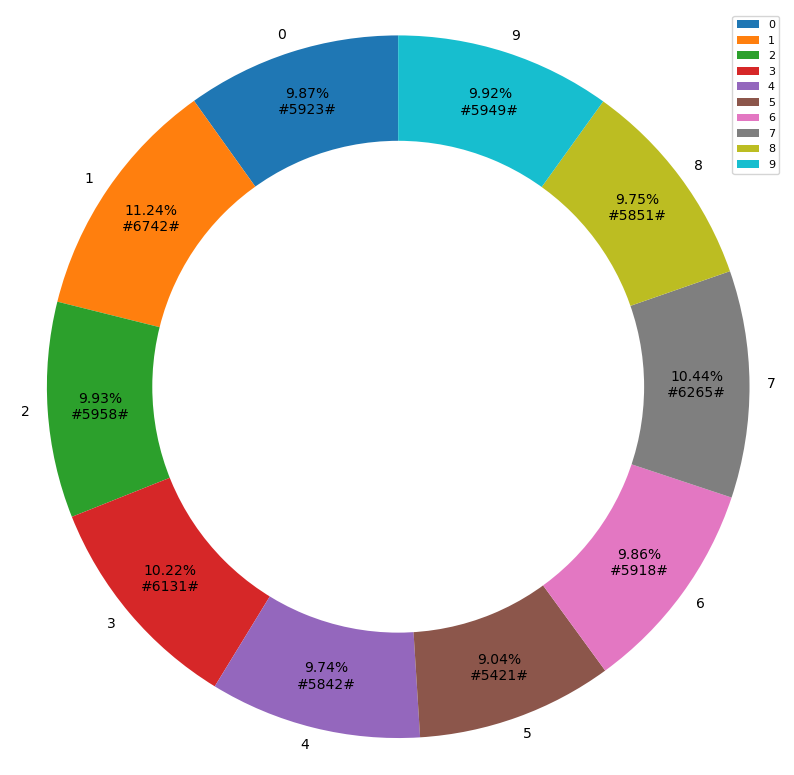

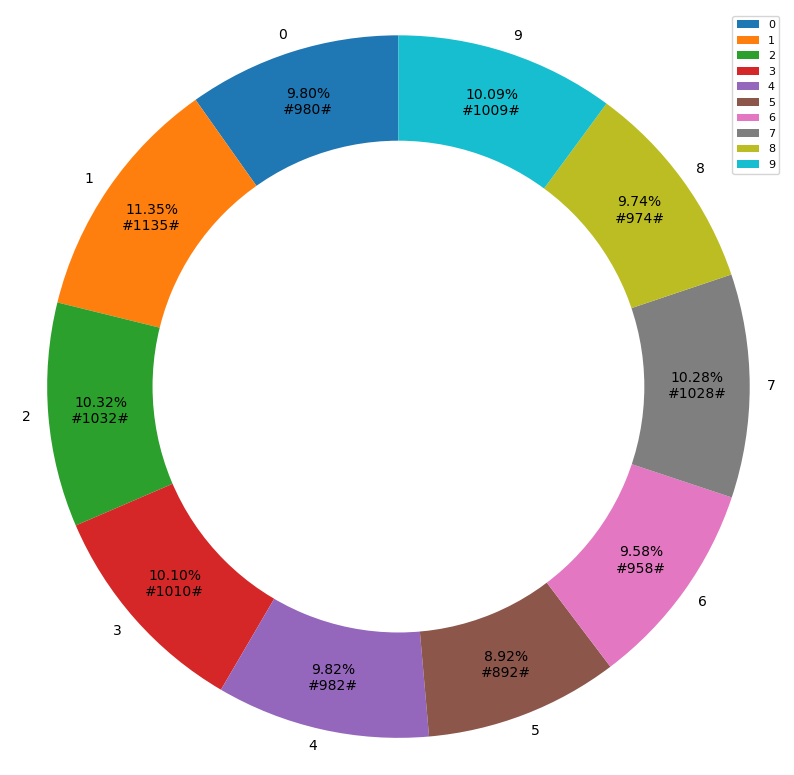

In [5]:
## 训练集测试集label分布统计，看训练集和测试集里面分别有多少个1，多少个2……

# y_train 60000 y_test 10000
y_train_numpy = y_train.numpy()
y_test_numpy = y_test.numpy()
# print(y_train_numpy.shape, y_test_numpy.shape)

count_train = np.zeros(10)
count_test = np.zeros(10)
for i in y_train_numpy:
    count_train[i] += int(1)
for j in y_test_numpy:
    count_test[j] += int(1)
labels_ = np.arange(10)
# print(labels_)
# print(count_train)
# print(count_test)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # 同时显示数值和占比的饼图
        return '{p:.2f}%\n#{v:d}#'.format(p=pct,v=val)
    return my_autopct


plt.figure(figsize=(10, 10), dpi=100)
plt.pie(count_train, labels=labels_, autopct=make_autopct(count_train),
        textprops={'fontsize': 10}, labeldistance=1.05, pctdistance=0.85, startangle=90)
plt.pie([1], radius=0.7, colors='w')
plt.legend(loc='upper right', fontsize=8)
# plt.title("count_train_data", fontsize=15)
plt.axis('equal')
plt.savefig('./visualization_figures_save/count_train_data', bbox_inches='tight')
# plt.show()

plt.figure(figsize=(10, 10), dpi=100)
plt.pie(count_test, labels=labels_, autopct=make_autopct(count_test),
        textprops={'fontsize': 10}, labeldistance=1.05, pctdistance=0.85, startangle=90)
plt.pie([1], radius=0.7, colors='w')
plt.legend(loc='upper right', fontsize=8)
# plt.title("count_train_data", fontsize=15)
plt.axis('equal')
plt.savefig('./visualization_figures_save/count_test_data', bbox_inches='tight')
# plt.show()


<ipython-input-5-8e25083fc6d2>:5: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  idx = (y_train == x).nonzero().flatten()[:9] #记录每个类别的ID（前9个）


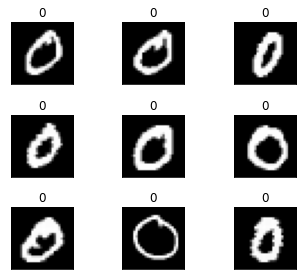

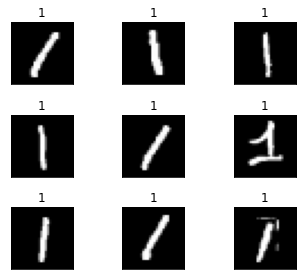

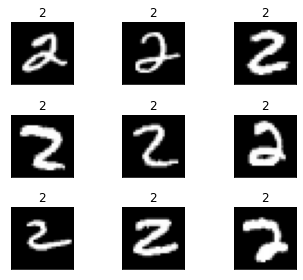

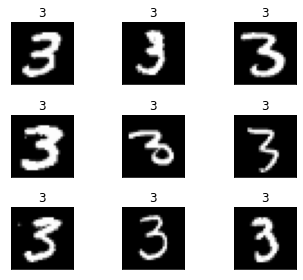

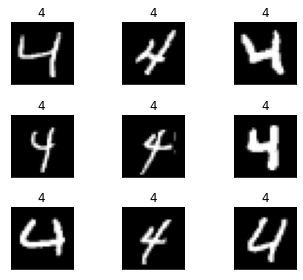

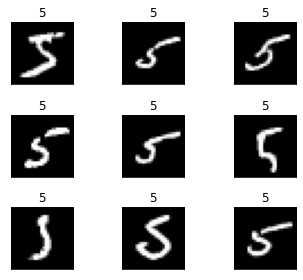

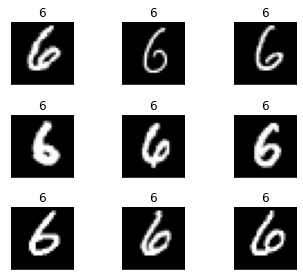

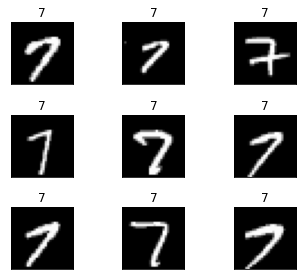

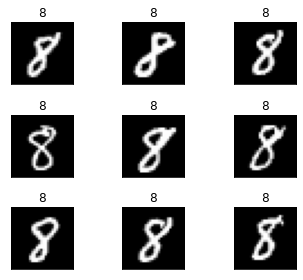

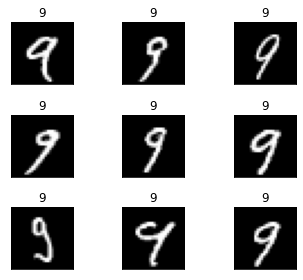

In [5]:
## 按照label展示每个label的图片9张，比如展示依次展示label1 label2等各9张图

for i in range(10):
    x = torch.tensor(i)
    idx = (y_train == x).nonzero().flatten()[:9] #记录每个类别的ID（前9个）
    # print (idx)
    
    fig = plt.figure()
    k = 0
    for j in idx:
        k+=1
        plt.subplot(3,3,k),plt.imshow(data_train.data[j].numpy(), cmap='gray')
        
        plt.title('%i' % data_train.targets[j].numpy())
        plt.xticks([]),plt.yticks([])
        plt.tight_layout()
        plt.savefig('./visualization_figures_save/' + str(i))
        # plt.savefig('./visualization_figures_save/数字' + str(i) + '#九宫格')
    plt.show()
